#***Importing the libraries***

In [1]:
import pandas as pan
import matplotlib.pyplot as plt
import seaborn as sea
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#***Loading dataset***

In [2]:
obesity_data = pan.read_csv("/content/ObesityDataSet_raw_and_data_sinthetic.csv")
obesity_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


#***Checking the null values***

In [3]:
obesity_data.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


#***Description of the Dataset***

In [4]:
obesity_data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


#***Exploratory Data Analysis***

***Gender Distribution***

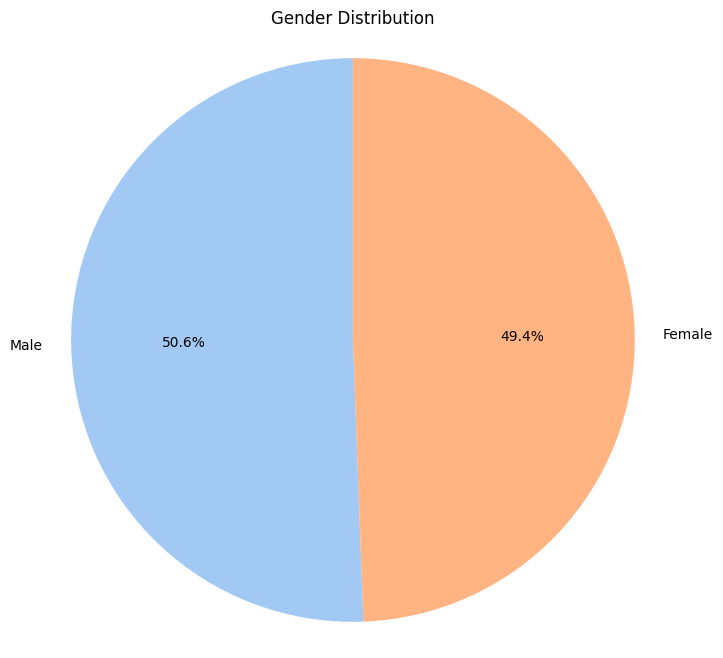

In [5]:
gender_counts = obesity_data['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sea.color_palette('pastel')[0:2])
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

***Age vs. Weight***

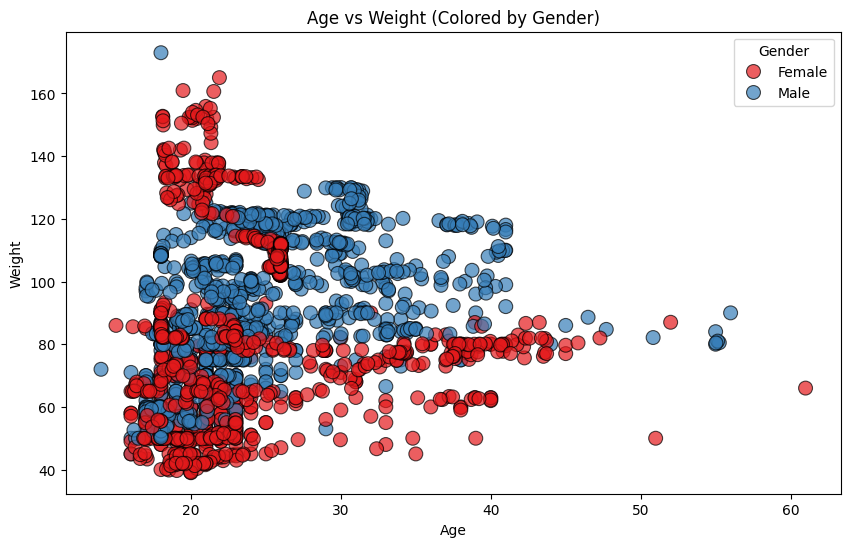

In [6]:
plt.figure(figsize=(10, 6))
sea.scatterplot(data=obesity_data, x='Age', y='Weight', hue='Gender', palette='Set1', s=100, edgecolor='black', alpha=0.7)
plt.title('Age vs Weight (Colored by Gender)')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.legend(title='Gender')
plt.show()

***Frequency of Caloric Food Consumption by Gender***

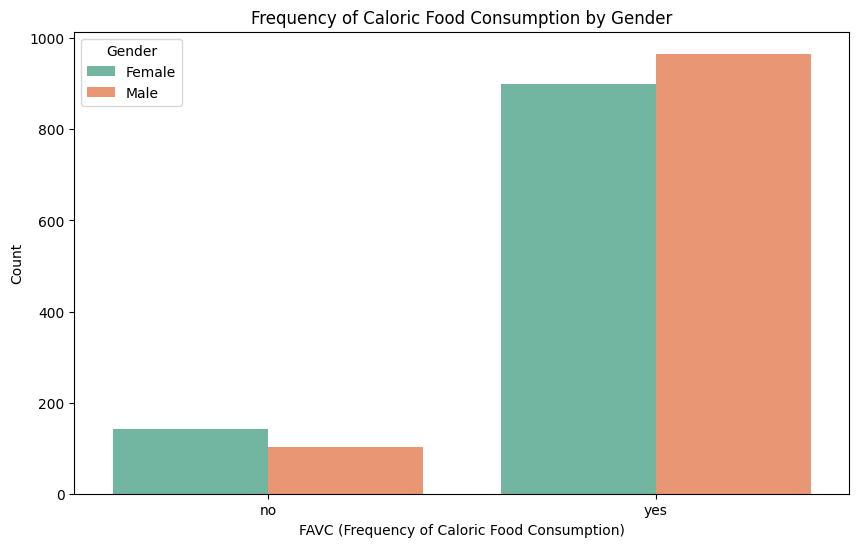

In [7]:
plt.figure(figsize=(10, 6))
sea.countplot(data=obesity_data, x='FAVC', hue='Gender', palette='Set2')
plt.title('Frequency of Caloric Food Consumption by Gender')
plt.xlabel('FAVC (Frequency of Caloric Food Consumption)')
plt.ylabel('Count')
plt.show()

***Correlation Heatmap***

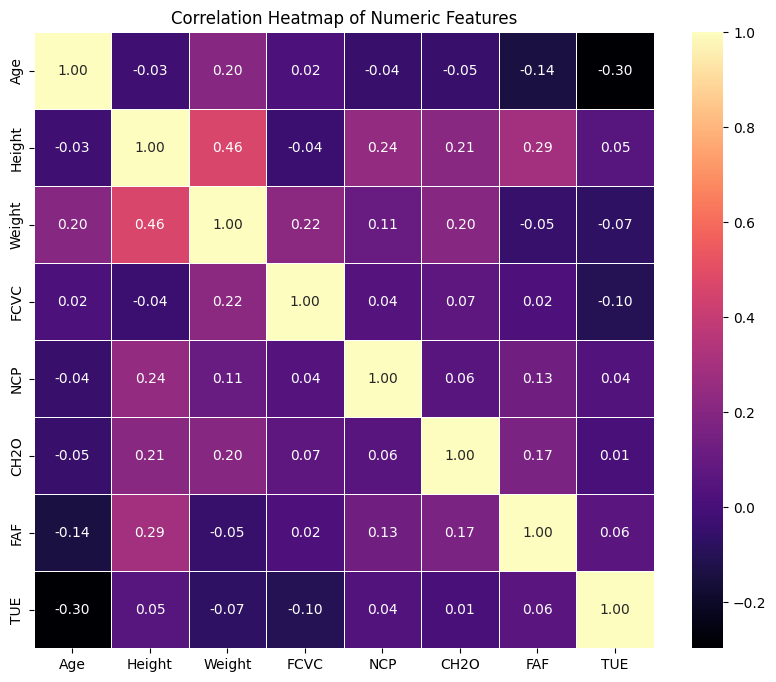

In [8]:
numeric_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
correlation_matrix = obesity_data[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sea.heatmap(correlation_matrix, annot=True, cmap='magma', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

***Comparing Weight Distribution by Obesity Level***

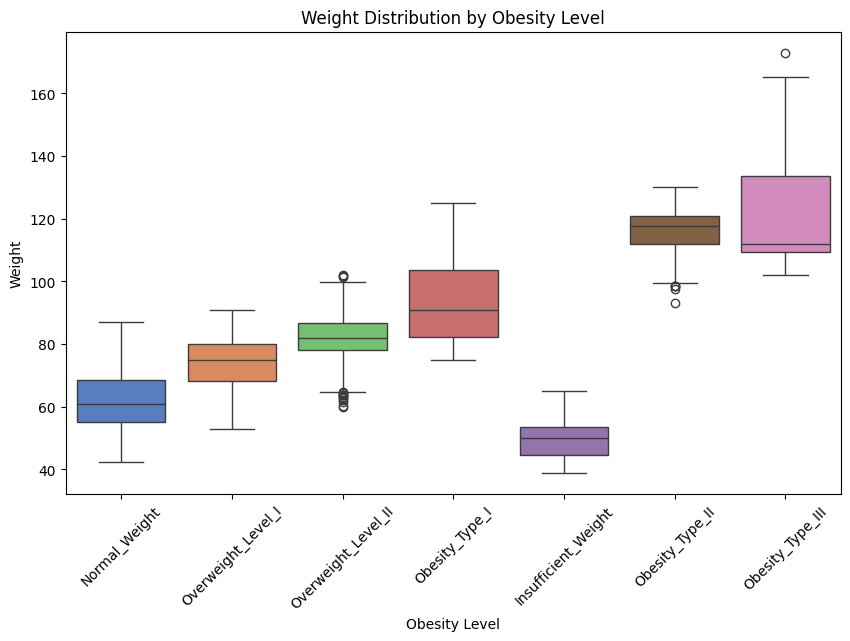

In [9]:
plt.figure(figsize=(10, 6))
sea.boxplot(data=obesity_data, x='NObeyesdad', y='Weight', palette='muted')
plt.title('Weight Distribution by Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Weight')
plt.xticks(rotation=45)
plt.show()

#**Converting the binary target column to numerical using LabelEncoder**

In [10]:
label_encoder = LabelEncoder()
obesity_data['family_history_with_overweight'] = label_encoder.fit_transform(obesity_data['family_history_with_overweight'])

#**Choosing numerical features for the model**

In [11]:
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
X = obesity_data[numerical_features]
y = obesity_data['family_history_with_overweight']

#**Splitting the data into training and testing sets**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Logistic Regression Model**

In [13]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)
log_reg_pred = log_reg_model.predict(X_test)

**Classification Report**

In [14]:
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, log_reg_pred))

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.47      0.56        80
           1       0.89      0.95      0.92       343

    accuracy                           0.86       423
   macro avg       0.78      0.71      0.74       423
weighted avg       0.85      0.86      0.85       423



**Confusion Matrix**

In [15]:
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix', color_map='Purples'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sea.heatmap(cm, annot=True, fmt="d", cmap=color_map, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

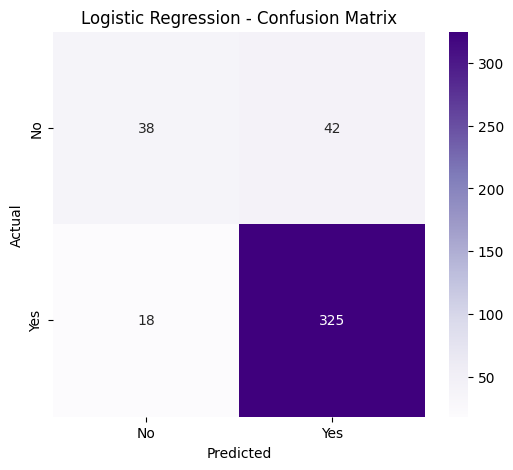

In [16]:
plot_confusion_matrix(y_test, log_reg_pred, 'Logistic Regression - Confusion Matrix', 'Purples')

#**K-Nearest Neighbors Model (KNN)**

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

**Classification Report for KNN**

In [18]:
print("KNN - Classification Report:")
print(classification_report(y_test, knn_pred))

KNN - Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.57      0.67        80
           1       0.91      0.97      0.94       343

    accuracy                           0.89       423
   macro avg       0.85      0.77      0.80       423
weighted avg       0.89      0.89      0.88       423



**Plotting Confusion Matrix for KNN**

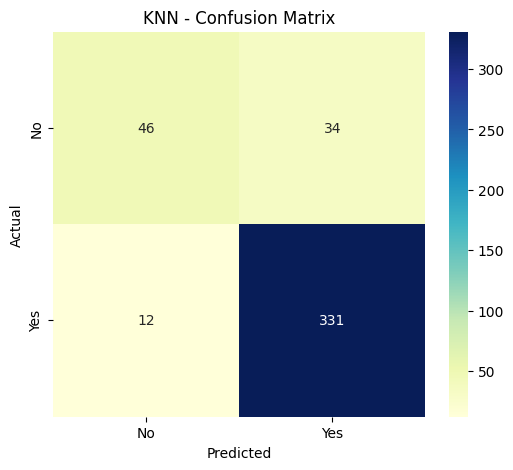

In [19]:
plot_confusion_matrix(y_test, knn_pred, 'KNN - Confusion Matrix', 'YlGnBu')

#**Naive Bayes Model**

In [20]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

**Classification Report for Naive Bayes**

In [21]:
print("Naive Bayes - Classification Report:")
print(classification_report(y_test, nb_pred))

Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.69      0.63        80
           1       0.92      0.89      0.90       343

    accuracy                           0.85       423
   macro avg       0.75      0.79      0.77       423
weighted avg       0.86      0.85      0.85       423



**Plotting Confusion Matrix for Naive Bayes**

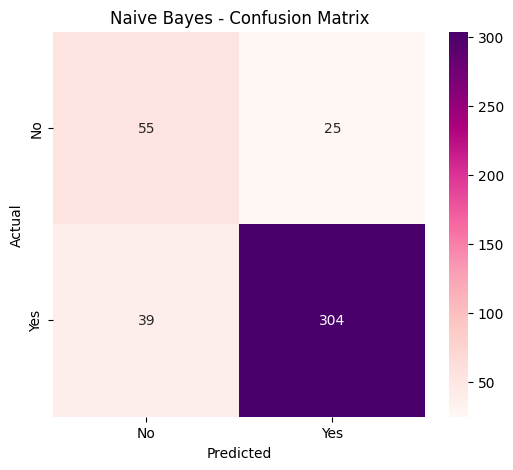

In [22]:
plot_confusion_matrix(y_test, nb_pred, 'Naive Bayes - Confusion Matrix', 'RdPu')